# Extended Research Project Model Development (nb)

## 1. Preprocess the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 21.2 MB/s eta 0:00:00


In [3]:
!pip install scikit-learn==1.3.2 --upgrade --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 140.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found 

In [1]:
# === Step 0: Import Libraries ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
import optuna
import joblib
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [6]:
# === Step 1: Data Preparation ===
# load the data
df = pd.read_csv("/content/drive/MyDrive/ERP/Naive Bayes/Final_bayes_knn_ols_svm_svd.csv.gz", compression="gzip")

df

,net_income_usd,total_assets_usd,shareholders_funds_usd,capital_usd,revenue_usd,schooling_years_2020,urban_pop_growth_2022,logistics_index_2018,life_expectancy_2022,female_labor_participation_2023,...,svd_91,svd_92,svd_93,svd_94,svd_95,svd_96,svd_97,svd_98,svd_99,svd_100
0,9.447491e+05,0.181549,NaN,-0.003279,3.541786e+06,1.186760,-1.189779,-0.492681,-0.677844,1.057754,...,0.013482,-0.023297,-0.026130,-0.019788,0.008973,-0.005500,-0.019473,-0.009817,0.011526,-0.029350
1,1.765783e+04,0.181549,0.098608,0.040249,1.437969e+06,1.186760,-1.189779,-0.492681,-0.677844,1.057754,...,0.012744,0.026045,0.019724,0.076969,0.012354,-0.062352,-0.000067,0.075836,-0.045383,0.066350
2,-2.502728e+04,0.181549,-0.168453,0.040249,1.246335e+06,1.186760,-1.189779,-0.492681,-0.677844,1.057754,...,0.006091,0.001558,-0.050122,0.024515,0.019798,-0.018739,-0.008884,-0.005824,0.011487,0.007655
3,1.023630e+03,0.181549,0.020692,0.028005,7.675140e+05,1.186760,-1.189779,-0.492681,-0.677844,1.057754,...,-0.001193,-0.001749,0.001392,0.000009,-0.001890,-0.003163,-0.002057,-0.000404,0.000297,-0.000742
4,6.034728e+02,0.181549,0.013782,0.028005,7.037159e+05,1.186760,-1.189779,-0.492681,-0.677844,1.057754,...,0.000117,0.000087,0.000720,0.000368,-0.000447,0.000312,0.000811,0.000741,-0.000101,-0.000551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477072,-9.593861e+03,0.181549,0.188289,0.040249,-7.980458e+03,-2.574365,2.371344,-1.654855,-1.126116,-1.398460,...,-0.005517,0.001996,0.077717,-0.047973,-0.012855,0.029138,-0.006654,0.009551,-0.004272,-0.026978
477073,-1.343988e+04,-0.028028,-0.004174,0.040249,-1.343954e+04,-2.574365,2.371344,-1.654855,-1.126116,-1.398460,...,-0.001345,0.001982,-0.014596,0.005058,0.005936,-0.001358,-0.003218,0.003140,0.005679,-0.002221
477074,-1.027999e+05,0.181549,0.126416,0.040249,-9.145863e+04,-0.702729,0.619942,0.842805,0.877332,-0.384113,...,-0.001433,0.003882,0.002399,-0.002214,-0.000403,0.002592,-0.000637,0.000756,-0.001343,-0.000120
477075,-7.534849e+01,-0.024172,0.000283,0.000499,-9.680114e+05,-0.702729,0.619942,0.842805,0.877332,-0.384113,...,-0.003776,-0.006383,0.003070,0.000144,-0.000320,0.006390,0.004064,0.001612,-0.001478,0.002275


In [7]:
# Function to identify missing values (either NaN or custom strings)
def is_custom_nan(x):
    return pd.isna(x) or (isinstance(x, str) and x.strip().lower() in custom_missing_values)

# Count NaN values in each column
# Count missing values in each column using the custom rule
nan_count = df.apply(lambda col: col.apply(is_custom_nan).sum())

# Display the result
nan_count

,0
net_income_usd,0
total_assets_usd,0
shareholders_funds_usd,157
capital_usd,0
revenue_usd,0
...,...
svd_96,0
svd_97,0
svd_98,0
svd_99,0


In [8]:
nan_count

,0
net_income_usd,0
total_assets_usd,0
shareholders_funds_usd,157
capital_usd,0
revenue_usd,0
...,...
svd_96,0
svd_97,0
svd_98,0
svd_99,0


In [9]:
# create a df for classification
df_cls = df.copy()

# drop NaN
df_cls = df_cls.dropna()
df_cls.isna().sum().sum()

0

In [10]:
df["revenue_usd"]

,revenue_usd
0,3.541786e+06
1,1.437969e+06
2,1.246335e+06
3,7.675140e+05
4,7.037159e+05
...,...
477072,-7.980458e+03
477073,-1.343954e+04
477074,-9.145863e+04
477075,-9.680114e+05


In [11]:
def create_success_flag(df):
    """
    Create a binary 'success' column based on revenue, net income, and cash flow thresholds.
    A company is considered successful if:
        - revenue_usd > 455.230 (top quartile)
        - net_income_usd > 0 (profitable)

    Parameters:
        df (pd.DataFrame): Input DataFrame containing startup financial data.

    Returns:
        df_new (pd.DataFrame): DataFrame with the added 'success' column.
        success_counts (pd.Series): Count of 0s and 1s in the 'success' column.
    """

    # Make a copy of the original DataFrame to preserve the input
    df_new = df.copy()

    # Define the success condition as a binary indicator
    # This checks whether all three conditions are met for each row
    df_new["success"] = (
        (df_new["revenue_usd"] > 455.230) &      # Top quartile of revenue
        (df_new["net_income_usd"] > 0)           # Positive net income
    ).astype(int)  # Convert boolean values to 0 or 1

    # Drop the columns used for creating the target to avoid data leakage
    df_new.drop(columns=["revenue_usd", "net_income_usd"], inplace=True)

    # Count how many startups are labeled as success (1) and not success (0)
    success_counts = df_new["success"].value_counts().sort_index()

    return df_new, success_counts

In [12]:
# create a df for classification
df_class, success_counts = create_success_flag(df_cls)
print(df_class["success"])
print(success_counts)

1         1
2         0
3         1
4         1
5         1
         ..
477072    0
477073    0
477074    0
477075    0
477076    0
Name: success, Length: 476920, dtype: int64
success
0    390252
1     86668
Name: count, dtype: int64


In [13]:
print("Total rows:", len(df))
print("Revenue > 455.230:", (df["revenue_usd"] > 455.230).sum())
print("Net income > 0:", (df["net_income_usd"] > 0).sum())
print("Both conditions met:", ((df["revenue_usd"] > 455.230) & (df["net_income_usd"] > 0)).sum())


Total rows: 477077
Revenue > 455.230: 122002
Net income > 0: 229386
Both conditions met: 86755


In [14]:
# CLASSIFICATION: Define target and feature columns
target_col_cls = "success"
feature_cols_cls = [col for col in df_class.columns if col != target_col_cls]

# Extract features and target
X_cls = df_class[feature_cols_cls].values
y_cls = df_class[target_col_cls].values

# Split into train, validation, and test sets (2D arrays only, no reshape)
X_train_cls, X_temp_cls, y_train_cls, y_temp_cls = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)
X_val_cls, X_test_cls, y_val_cls, y_test_cls = train_test_split(X_temp_cls, y_temp_cls, test_size=0.5, random_state=42)

## 2. Define the nb model

In [ ]:
'''
# === Step 2: Define nb Model for classification===
# CLASSIFICATION: Define nb model for Classification
class nbClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):
        super(nbClassifier, self).__init__()
        self.nb = nn.nb(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out, _ = self.nb(x)             # nb output
        out = out[:, -1, :]               # Use only last time step
        out = self.fc(out)                # Final classification layer
        return out
'''

'\n# === Step 2: Define nb Model for classification===\n# CLASSIFICATION: Define nb model for Classification\nclass nbClassifier(nn.Module):\n    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout):\n        super(nbClassifier, self).__init__()\n        self.nb = nn.nb(input_size, hidden_size, num_layers,\n                            batch_first=True, dropout=dropout)\n        self.fc = nn.Linear(hidden_size, num_classes)\n\n    def forward(self, x):\n        out, _ = self.nb(x)             # nb output\n        out = out[:, -1, :]               # Use only last time step\n        out = self.fc(out)                # Final classification layer\n        return out\n'

## 3. Tune hyperparameters by Optuna

In [ ]:
# === Step 3: Optuna Hyperparameter Tuning for Regression ===
# Objective function for Optuna
from sklearn.preprocessing import MinMaxScaler

# Scale inputs to be non-negative
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_val_scaled = scaler.transform(X_val_cls)

def objective_mnb(trial):
    alpha = trial.suggest_float("alpha", 1e-4, 10, log=True)
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train_scaled, y_train_cls)

    y_pred = model.predict(X_val_scaled)
    acc = accuracy_score(y_val_cls, y_pred)

    return 1.0 - acc

study = optuna.create_study(direction="minimize")
study.optimize(objective_mnb, n_trials=30)


# Best parameters
best_params_cls = study.best_trial.params
print("Best hyperparameters:", best_params_cls)

[I 2025-07-03 02:15:14,929] A new study created in memory with name: no-name-eea1c906-bc32-429f-bf3d-5a32d8c7786c
[I 2025-07-03 02:15:15,148] Trial 0 finished with value: 0.18088288741647796 and parameters: {'alpha': 0.0033518750575143603}. Best is trial 0 with value: 0.18088288741647796.
[I 2025-07-03 02:15:15,366] Trial 1 finished with value: 0.18088288741647796 and parameters: {'alpha': 0.027802353261220904}. Best is trial 0 with value: 0.18088288741647796.
[I 2025-07-03 02:15:15,569] Trial 2 finished with value: 0.18088288741647796 and parameters: {'alpha': 0.06698521345047044}. Best is trial 0 with value: 0.18088288741647796.
[I 2025-07-03 02:15:15,757] Trial 3 finished with value: 0.18088288741647796 and parameters: {'alpha': 0.01848733166773196}. Best is trial 0 with value: 0.18088288741647796.
[I 2025-07-03 02:15:15,960] Trial 4 finished with value: 0.18088288741647796 and parameters: {'alpha': 0.004477470860837364}. Best is trial 0 with value: 0.18088288741647796.
[I 2025-07-0

Best hyperparameters: {'alpha': 0.0033518750575143603}


## 4. Re-learn with the optimized parameters

In [ ]:
# === Step 4: Train Final Model with Best Params (Classification) ===
nb_model_cls = MultinomialNB(
    alpha=best_params_cls['alpha']
)

# Train the model on the training set
nb_model_cls.fit(X_train_scaled, y_train_cls)

# Predict on validation set (optional)
y_pred_val = nb_model_cls.predict(X_val_scaled)

In [ ]:
'''
import shap

# === Define prediction function for nb classifier ===
def model_predict_nb_classifier(X_numpy):
    return nb_model_cls.predict_proba(X_numpy)[:, 1]

# === Select background and explanation data ===
background_data = X_train_cls[:100]
explanation_data = X_val_cls[:50]

# === Initialize SHAP KernelExplainer ===
explainer = shap.KernelExplainer(model_predict_nb_classifier, background_data)

# === Compute SHAP values (for class 1) ===
shap_values = explainer.shap_values(explanation_data)  # List of arrays: one per class

# === Create feature names ===
feature_names = [f"f{i}" for i in range(X_train_cls.shape[1])]

# === Save SHAP values for class 1 ===
shap_df = pd.DataFrame(shap_values[1], columns=feature_names)
shap_df.to_csv("shap_values_nb_cls.csv", index=False)

# === SHAP summary plot ===
shap.summary_plot(shap_values[1], explanation_data, feature_names=feature_names)
'''

'\nimport shap\n\n# === Define prediction function for nb classifier ===\ndef model_predict_nb_classifier(X_numpy):\n    return nb_model_cls.predict_proba(X_numpy)[:, 1]\n\n# === Select background and explanation data ===\nbackground_data = X_train_cls[:100]\nexplanation_data = X_val_cls[:50]\n\n# === Initialize SHAP KernelExplainer ===\nexplainer = shap.KernelExplainer(model_predict_nb_classifier, background_data)\n\n# === Compute SHAP values (for class 1) ===\nshap_values = explainer.shap_values(explanation_data)  # List of arrays: one per class\n\n# === Create feature names ===\nfeature_names = [f"f{i}" for i in range(X_train_cls.shape[1])]\n\n# === Save SHAP values for class 1 ===\nshap_df = pd.DataFrame(shap_values[1], columns=feature_names)\nshap_df.to_csv("shap_values_nb_cls.csv", index=False)\n\n# === SHAP summary plot ===\nshap.summary_plot(shap_values[1], explanation_data, feature_names=feature_names)\n'

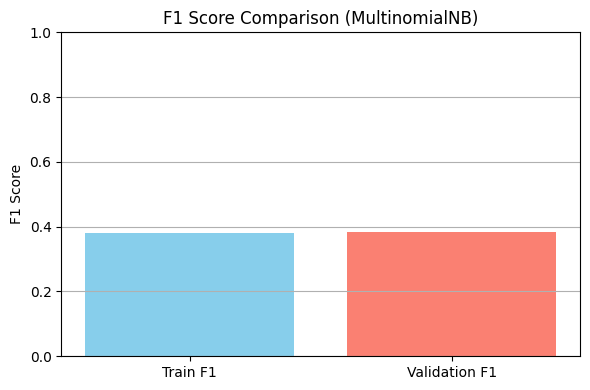

In [ ]:
# === Predict on train and validation sets ===
y_pred_train = nb_model_cls.predict(X_train_cls)
y_pred_val = nb_model_cls.predict(X_val_cls)

# === Compute F1 scores ===
train_f1 = f1_score(y_train_cls, y_pred_train)
val_f1 = f1_score(y_val_cls, y_pred_val)

# === Bar plot for F1 comparison ===
plt.figure(figsize=(6, 4))
plt.bar(["Train F1", "Validation F1"], [train_f1, val_f1], color=["skyblue", "salmon"])
plt.title("F1 Score Comparison (MultinomialNB)")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

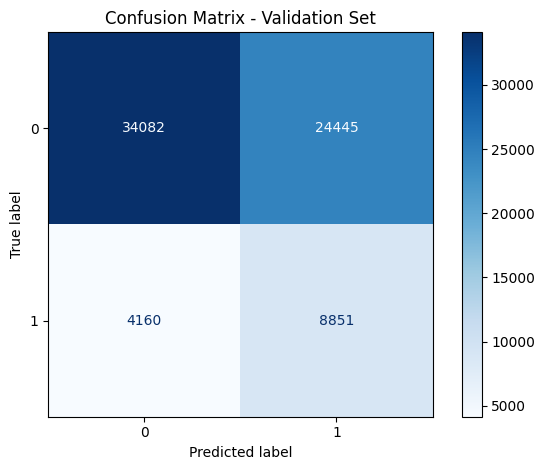

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_val_cls, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

plt.title("Confusion Matrix - Validation Set")
plt.tight_layout()
plt.show()

In [ ]:
# === Get predicted probabilities for each class ===
probs = nb_model_cls.predict_proba(X_val_cls)
prob_0 = probs[:, 0]
prob_1 = probs[:, 1]

# === Get predicted class labels ===
predicted_labels = nb_model_cls.predict(X_val_cls)

# === Combine true labels, predicted labels, and class probabilities ===
results_cls_df = pd.DataFrame({
    "true_label": y_val_cls,
    "predicted_label": predicted_labels,
    "probability_0": prob_0,
    "probability_1": prob_1
})

# === Save results to CSV file ===
results_cls_df.to_csv("classification_results.csv", index=False)

# === Preview the first few rows ===
print(results_cls_df.head())

   true_label  predicted_label  probability_0  probability_1
0           0                1       0.403372       0.596628
1           0                0       0.990459       0.009541
2           0                0       0.981224       0.018776
3           0                0       0.507436       0.492564
4           0                0       0.987664       0.012336


## 5. Evaluate the model

In [17]:
from sklearn.metrics import (
    roc_auc_score, f1_score, precision_score,
    recall_score, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_nb_classifier(model, X, y, dataset_name="", threshold=0.3):
    """
    Evaluate a trained nb classifier on given dataset.
    """
    # Predict probabilities and class labels
    prob = model.predict_proba(X)[:, 1]  # Probability of class 1
    preds = (prob > threshold).astype(int)     # Apply threshold

    # Metrics
    auc = roc_auc_score(y, prob)
    f1 = f1_score(y, preds)
    precision = precision_score(y, preds)
    recall = recall_score(y, preds)
    conf_matrix = confusion_matrix(y, preds)

    # G-Mean
    tn, fp, fn, tp = conf_matrix.ravel()
    tpr = tp / (tp + fn + 1e-6)
    tnr = tn / (tn + fp + 1e-6)
    gmean = np.sqrt(tpr * tnr)

    # Print results
    print(f"\n--- Evaluation on {dataset_name} ---")
    print(f"AUC-ROC:     {auc:.4f}")
    print(f"F1-Score:    {f1:.4f}")
    print(f"Precision:   {precision:.4f}")
    print(f"Recall:      {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"Mean G-Mean: {gmean:.4f}")

    # Confusion matrix plot
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {dataset_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


--- Evaluation on Training Data ---
AUC-ROC:     0.6879
F1-Score:    0.3825
Precision:   0.2479
Recall:      0.8366
Confusion Matrix:
[[119076 154061]
 [  9918  50789]]
Mean G-Mean: 0.6039


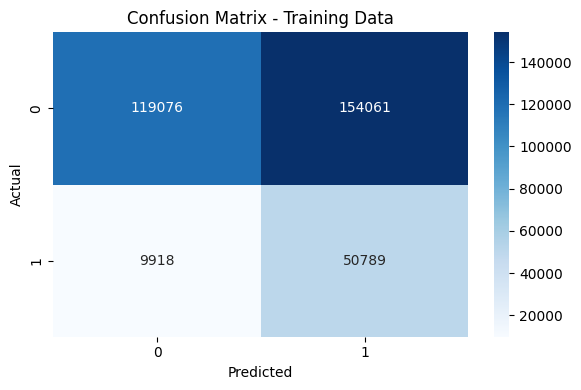


--- Evaluation on Validation Data ---
AUC-ROC:     0.6905
F1-Score:    0.3858
Precision:   0.2500
Recall:      0.8449
Confusion Matrix:
[[25550 32977]
 [ 2018 10993]]
Mean G-Mean: 0.6073


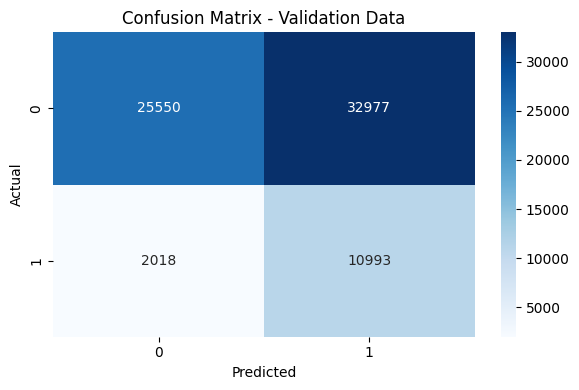


--- Evaluation on Test Data ---
AUC-ROC:     0.6821
F1-Score:    0.3784
Precision:   0.2451
Recall:      0.8297
Confusion Matrix:
[[25489 33099]
 [ 2205 10745]]
Mean G-Mean: 0.6008


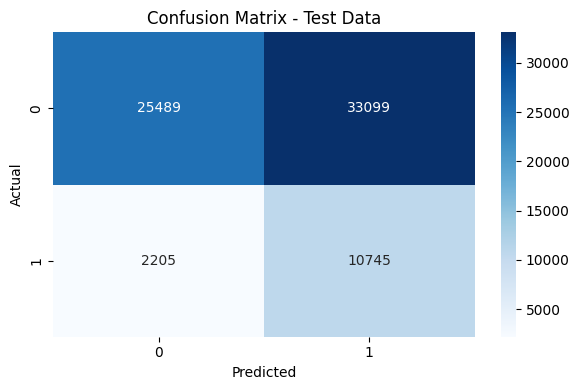

In [18]:
evaluate_nb_classifier(nb_model_cls, X_train_cls, y_train_cls, "Training Data")
evaluate_nb_classifier(nb_model_cls, X_val_cls, y_val_cls, "Validation Data")
evaluate_nb_classifier(nb_model_cls, X_test_cls, y_test_cls, "Test Data")


--- Evaluation on Test Data @ 0.3 ---
AUC-ROC:     0.6821
F1-Score:    0.3784
Precision:   0.2451
Recall:      0.8297
Confusion Matrix:
[[25489 33099]
 [ 2205 10745]]
Mean G-Mean: 0.6008


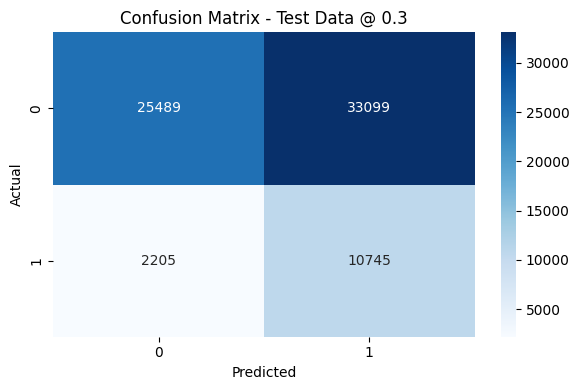


--- Evaluation on Test Data @ 0.5 ---
AUC-ROC:     0.6821
F1-Score:    0.3756
Precision:   0.2611
Recall:      0.6694
Confusion Matrix:
[[34050 24538]
 [ 4281  8669]]
Mean G-Mean: 0.6237


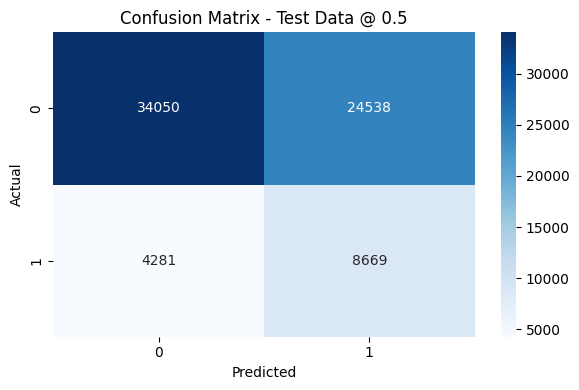


--- Evaluation on Test Data @ 0.1 ---
AUC-ROC:     0.6821
F1-Score:    0.3775
Precision:   0.2443
Recall:      0.8304
Confusion Matrix:
[[25317 33271]
 [ 2196 10754]]
Mean G-Mean: 0.5990


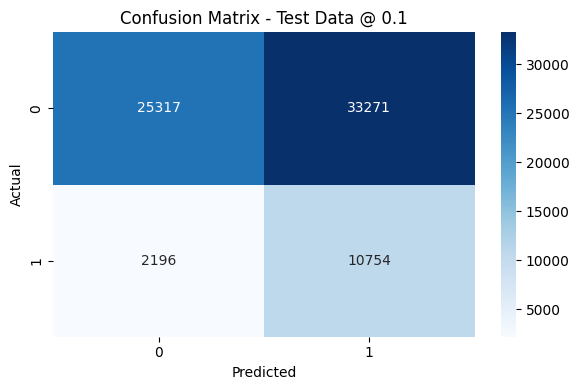

In [ ]:
# Run on test set with different thresholds
evaluate_nb_classifier(nb_model_cls, X_test_cls, y_test_cls, "Test Data @ 0.3", threshold=0.3)
evaluate_nb_classifier(nb_model_cls, X_test_cls, y_test_cls, "Test Data @ 0.5", threshold=0.5)
evaluate_nb_classifier(nb_model_cls, X_test_cls, y_test_cls, "Test Data @ 0.1", threshold=0.1)

## 6. Save the model

In [ ]:
import joblib
import pandas as pd

# Save trained nb model
joblib.dump(nb_model_cls, "nb_model.pkl")

# Save best hyperparameters as CSV
params_df = pd.DataFrame([best_params_cls])
params_df.to_csv("best_params_cls.csv", index=False)

# Save StandardScaler
#joblib.dump(scaler, "scaler.pkl")

## Optional: load the model

In [15]:
'''
# Load best hyperparameters from CSV
loaded_params_df = pd.read_csv("best_params_cls.csv")
best_params_cls = loaded_params_df.iloc[0].to_dict()

# Convert integer-like float values to int
best_params_cls['n_neighbors'] = int(best_params_cls['n_neighbors'])
best_params_cls['p'] = int(best_params_cls['p'])
'''

# Load trained nb model
nb_model_cls = joblib.load("/content/drive/MyDrive/ERP/Naive Bayes/nb_model.pkl")

# Load scaler
#scaler = joblib.load("scaler.pkl")